# Storage of 'good' descriptor parameter configurations for hydrogenMD

## Distance 2b parameters

### There is substantial differences when varying the covariance_type paramter, so there will be differing list for each covariance_type


In [ ]:
# Parameter Lists for covariance_type = pp :: piecewise polynomial 
cutoff_pp = [4,5]
n_sparse_pp = [15,20]
delta_pp = [1]
theta_uniform_pp = [1.25,1.5]
default_sigma_pp = ['0.0000001 0.0000001 0.0 0.0','0.00000001 0.00000001 0.0 0.0']
sparse_method_pp = ['uniform','cur_points']
covariance_type_pp = ['PP'] # , 'Gaussian', 'BOND_REAL_SPACE','dot_product']


In [ ]:
# Parameter Lists for covariance_type = ard_se :: squared exponential
cutoff_ardse = [4,5]
n_sparse_ardse = [15,20,25]
delta_ardse = [1]
theta_uniform_ardse = [1,1.5,1.75]
default_sigma_ardse = ['0.0000001 0.0000001 0.0 0.0','0.00000001 0.00000001 0.0 0.0']
sparse_method_ardse = ['uniform']
covariance_type_ardse = ['ARD_SE'] # , 'Gaussian', 'BOND_REAL_SPACE','dot_product']


In [ ]:
# Parameter Lists for covariance_type = gaussian  :: Gaussian
cutoff_gauss = [3,4]
n_sparse_gauss = [15,20,25]
delta_gauss = [1]
theta_uniform_gauss = [0.1]
default_sigma_gauss = ['0.0000001 0.0000001 0.0 0.0']
sparse_method_gauss = ['uniform']
covariance_type_gauss = ['Gaussian'] #, 'BOND_REAL_SPACE','dot_product']

## Simple test run of the 'good' parameters

In [1]:
# Importing everthing we need 
import sys
sys.path.append('../')

from GAP.gapmodels import GAPModel
from GAP.gapmodels import Split
from GAP.gapdescriptors import distance_2b
from GAP.gapplot import QualityPlot
import matplotlib.pyplot as plt
from textwrap import wrap

In [2]:
## Import Hydrogen_MD Data and split into training and test data, use split 80%/20%
data='/Users/simon/simon_ml/GAP/hydrogen_md.xyz'
train_percentage = 0.8
split = Split(data, train_percentage)

#Perform the acutal split
train_file = 'train.xyz'
test_file = 'test.xyz'
split.split(train_file, test_file)

# Get the splitted data
train,test = split.get_splitted_data()

# Get the names of the data files containing the splitted data, just for completeness purposes. These should be 
# the same as the passed files at the split.split() method.
train_file, test_file = split.get_splitted_data_files()

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/ase/io/extxyz.py:997: UserWarning: write_xyz() overwriting array "forces" present in atoms.arrays with stored results from calculator
  warnings.warn('write_xyz() overwriting array "{0}" present '
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/ase/io/extxyz.py:997: UserWarning: write_xyz() overwriting array "energies" present in atoms.arrays with stored results from calculator
  warnings.warn('write_xyz() overwriting array "{0}" present '


## Iterate over list of configurations and perform training and fitting. Then see the quality of the fit using  gapplot.QualityPlot.

### Pythonic way of getting all list combinations

In [4]:
import itertools
li = [cutoff,covariance_type,delta, theta_uniform, n_sparse, sparse_method, default_sigma]
comb = list(itertools.product(*li))
print(comb)
print(len(comb))

[(4, 'PP', 1, 1, 15, 'uniform', '0.0000001 0.0000001 0.0 0.0'), (4, 'PP', 1, 1, 20, 'uniform', '0.0000001 0.0000001 0.0 0.0'), (4, 'PP', 1, 1, 25, 'uniform', '0.0000001 0.0000001 0.0 0.0'), (4, 'PP', 1, 1, 30, 'uniform', '0.0000001 0.0000001 0.0 0.0'), (4, 'PP', 1, 1.5, 15, 'uniform', '0.0000001 0.0000001 0.0 0.0'), (4, 'PP', 1, 1.5, 20, 'uniform', '0.0000001 0.0000001 0.0 0.0'), (4, 'PP', 1, 1.5, 25, 'uniform', '0.0000001 0.0000001 0.0 0.0'), (4, 'PP', 1, 1.5, 30, 'uniform', '0.0000001 0.0000001 0.0 0.0'), (4, 'PP', 1, 2, 15, 'uniform', '0.0000001 0.0000001 0.0 0.0'), (4, 'PP', 1, 2, 20, 'uniform', '0.0000001 0.0000001 0.0 0.0'), (4, 'PP', 1, 2, 25, 'uniform', '0.0000001 0.0000001 0.0 0.0'), (4, 'PP', 1, 2, 30, 'uniform', '0.0000001 0.0000001 0.0 0.0'), (4, 'ard_se', 1, 1, 15, 'uniform', '0.0000001 0.0000001 0.0 0.0'), (4, 'ard_se', 1, 1, 20, 'uniform', '0.0000001 0.0000001 0.0 0.0'), (4, 'ard_se', 1, 1, 25, 'uniform', '0.0000001 0.0000001 0.0 0.0'), (4, 'ard_se', 1, 1, 30, 'uniform',

### Perform iteration

 distance_2b cutoff = 4 covariance_type = PP delta = 1 theta_uniform = 1 sparse_method = uniform add_species = T n_sparse = 15
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP0.xml at_file = 'train.xyz'  default_sigma = { 0.0000001 0.0000001 0.0 0.0 } gap = {  distance_2b cutoff = 4 covariance_type = PP delta = 1 theta_uniform = 1 sparse_method = uniform add_species = T n_sparse = 15}
libAtoms::Hello World: 11/03/2021   19:18:35
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 69515054
libAtoms::Hello World: global verbosity = 0

Calls to system_timer will do nothing by default


================================ Input parameters ==============================

atoms_filename = //MANDATORY//
at_file = train.xyz
ga


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP0.xml' | grep AT | sed 's/AT//'  > quip_2b_test0.xyz 

 distance_2b cutoff = 4 covariance_type = PP delta = 1 theta_uniform = 1 sparse_method = uniform add_species = T n_sparse = 20
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP1.xml at_file = 'train.xyz'  default_sigma = { 0.0000001 0.0000001 0.0 0.0 } gap = {  distance_2b cutoff = 4 covariance_type = PP delta = 1 theta_uniform = 1 sparse_method = uniform add_species = T n_sparse = 20}
libAtoms::Hello World: 11/03/2021   19:20:03
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 69603469
libAtoms::Hello World: global verbosity = 0

Calls to system_timer will do nothing by default


==================


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP1.xml' | grep AT | sed 's/AT//'  > quip_2b_test1.xyz 

 distance_2b cutoff = 4 covariance_type = PP delta = 1 theta_uniform = 1 sparse_method = uniform add_species = T n_sparse = 25
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP2.xml at_file = 'train.xyz'  default_sigma = { 0.0000001 0.0000001 0.0 0.0 } gap = {  distance_2b cutoff = 4 covariance_type = PP delta = 1 theta_uniform = 1 sparse_method = uniform add_species = T n_sparse = 25}
libAtoms::Hello World: 11/03/2021   19:21:43
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 69703476
libAtoms::Hello World: global verbosity = 0

Calls to system_timer will do nothing by default


==================


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP2.xml' | grep AT | sed 's/AT//'  > quip_2b_test2.xyz 

 distance_2b cutoff = 4 covariance_type = PP delta = 1 theta_uniform = 1 sparse_method = uniform add_species = T n_sparse = 30
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP3.xml at_file = 'train.xyz'  default_sigma = { 0.0000001 0.0000001 0.0 0.0 } gap = {  distance_2b cutoff = 4 covariance_type = PP delta = 1 theta_uniform = 1 sparse_method = uniform add_species = T n_sparse = 30}
libAtoms::Hello World: 11/03/2021   19:23:37
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 69817454
libAtoms::Hello World: global verbosity = 0

Calls to system_timer will do nothing by default


==================


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP3.xml' | grep AT | sed 's/AT//'  > quip_2b_test3.xyz 

 distance_2b cutoff = 4 covariance_type = PP delta = 1 theta_uniform = 1.5 sparse_method = uniform add_species = T n_sparse = 15
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP4.xml at_file = 'train.xyz'  default_sigma = { 0.0000001 0.0000001 0.0 0.0 } gap = {  distance_2b cutoff = 4 covariance_type = PP delta = 1 theta_uniform = 1.5 sparse_method = uniform add_species = T n_sparse = 15}
libAtoms::Hello World: 11/03/2021   19:25:47
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 69947940
libAtoms::Hello World: global verbosity = 0

Calls to system_timer will do nothing by default


==============


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP4.xml' | grep AT | sed 's/AT//'  > quip_2b_test4.xyz 

 distance_2b cutoff = 4 covariance_type = PP delta = 1 theta_uniform = 1.5 sparse_method = uniform add_species = T n_sparse = 20
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP5.xml at_file = 'train.xyz'  default_sigma = { 0.0000001 0.0000001 0.0 0.0 } gap = {  distance_2b cutoff = 4 covariance_type = PP delta = 1 theta_uniform = 1.5 sparse_method = uniform add_species = T n_sparse = 20}
libAtoms::Hello World: 11/03/2021   19:27:08
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 70028437
libAtoms::Hello World: global verbosity = 0

Calls to system_timer will do nothing by default


==============


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP5.xml' | grep AT | sed 's/AT//'  > quip_2b_test5.xyz 

 distance_2b cutoff = 4 covariance_type = PP delta = 1 theta_uniform = 1.5 sparse_method = uniform add_species = T n_sparse = 25
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP6.xml at_file = 'train.xyz'  default_sigma = { 0.0000001 0.0000001 0.0 0.0 } gap = {  distance_2b cutoff = 4 covariance_type = PP delta = 1 theta_uniform = 1.5 sparse_method = uniform add_species = T n_sparse = 25}
libAtoms::Hello World: 11/03/2021   19:28:44
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 70124725
libAtoms::Hello World: global verbosity = 0

Calls to system_timer will do nothing by default


==============


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP6.xml' | grep AT | sed 's/AT//'  > quip_2b_test6.xyz 

 distance_2b cutoff = 4 covariance_type = PP delta = 1 theta_uniform = 1.5 sparse_method = uniform add_species = T n_sparse = 30
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP7.xml at_file = 'train.xyz'  default_sigma = { 0.0000001 0.0000001 0.0 0.0 } gap = {  distance_2b cutoff = 4 covariance_type = PP delta = 1 theta_uniform = 1.5 sparse_method = uniform add_species = T n_sparse = 30}
libAtoms::Hello World: 11/03/2021   19:34:59
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 70499401
libAtoms::Hello World: global verbosity = 0

Calls to system_timer will do nothing by default


==============


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP7.xml' | grep AT | sed 's/AT//'  > quip_2b_test7.xyz 

 distance_2b cutoff = 4 covariance_type = PP delta = 1 theta_uniform = 2 sparse_method = uniform add_species = T n_sparse = 15
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP8.xml at_file = 'train.xyz'  default_sigma = { 0.0000001 0.0000001 0.0 0.0 } gap = {  distance_2b cutoff = 4 covariance_type = PP delta = 1 theta_uniform = 2 sparse_method = uniform add_species = T n_sparse = 15}
libAtoms::Hello World: 11/03/2021   20:34:20
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 74060318
libAtoms::Hello World: global verbosity = 0

Calls to system_timer will do nothing by default


==================


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP8.xml' | grep AT | sed 's/AT//'  > quip_2b_test8.xyz 

 distance_2b cutoff = 4 covariance_type = PP delta = 1 theta_uniform = 2 sparse_method = uniform add_species = T n_sparse = 20
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP9.xml at_file = 'train.xyz'  default_sigma = { 0.0000001 0.0000001 0.0 0.0 } gap = {  distance_2b cutoff = 4 covariance_type = PP delta = 1 theta_uniform = 2 sparse_method = uniform add_species = T n_sparse = 20}
libAtoms::Hello World: 11/03/2021   20:35:56
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 74156888
libAtoms::Hello World: global verbosity = 0

Calls to system_timer will do nothing by default


==================


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP9.xml' | grep AT | sed 's/AT//'  > quip_2b_test9.xyz 

 distance_2b cutoff = 4 covariance_type = PP delta = 1 theta_uniform = 2 sparse_method = uniform add_species = T n_sparse = 25
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP10.xml at_file = 'train.xyz'  default_sigma = { 0.0000001 0.0000001 0.0 0.0 } gap = {  distance_2b cutoff = 4 covariance_type = PP delta = 1 theta_uniform = 2 sparse_method = uniform add_species = T n_sparse = 25}
libAtoms::Hello World: 11/03/2021   20:38:07
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 74287041
libAtoms::Hello World: global verbosity = 0

Calls to system_timer will do nothing by default


=================


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP10.xml' | grep AT | sed 's/AT//'  > quip_2b_test10.xyz 

 distance_2b cutoff = 4 covariance_type = PP delta = 1 theta_uniform = 2 sparse_method = uniform add_species = T n_sparse = 30
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP11.xml at_file = 'train.xyz'  default_sigma = { 0.0000001 0.0000001 0.0 0.0 } gap = {  distance_2b cutoff = 4 covariance_type = PP delta = 1 theta_uniform = 2 sparse_method = uniform add_species = T n_sparse = 30}
libAtoms::Hello World: 11/03/2021   20:40:26
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 74426083
libAtoms::Hello World: global verbosity = 0

Calls to system_timer will do nothing by default


===============


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP11.xml' | grep AT | sed 's/AT//'  > quip_2b_test11.xyz 

 distance_2b cutoff = 4 covariance_type = ard_se delta = 1 theta_uniform = 1 sparse_method = uniform add_species = T n_sparse = 15
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP12.xml at_file = 'train.xyz'  default_sigma = { 0.0000001 0.0000001 0.0 0.0 } gap = {  distance_2b cutoff = 4 covariance_type = ard_se delta = 1 theta_uniform = 1 sparse_method = uniform add_species = T n_sparse = 15}
libAtoms::Hello World: 11/03/2021   20:43:12
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 74592126
libAtoms::Hello World: global verbosity = 0

Calls to system_timer will do nothing by default


=======


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP12.xml' | grep AT | sed 's/AT//'  > quip_2b_test12.xyz 

 distance_2b cutoff = 4 covariance_type = ard_se delta = 1 theta_uniform = 1 sparse_method = uniform add_species = T n_sparse = 20
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP13.xml at_file = 'train.xyz'  default_sigma = { 0.0000001 0.0000001 0.0 0.0 } gap = {  distance_2b cutoff = 4 covariance_type = ard_se delta = 1 theta_uniform = 1 sparse_method = uniform add_species = T n_sparse = 20}
libAtoms::Hello World: 11/03/2021   20:44:17
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 74657037
libAtoms::Hello World: global verbosity = 0

Calls to system_timer will do nothing by default


=======


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP13.xml' | grep AT | sed 's/AT//'  > quip_2b_test13.xyz 

 distance_2b cutoff = 4 covariance_type = ard_se delta = 1 theta_uniform = 1 sparse_method = uniform add_species = T n_sparse = 25
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP14.xml at_file = 'train.xyz'  default_sigma = { 0.0000001 0.0000001 0.0 0.0 } gap = {  distance_2b cutoff = 4 covariance_type = ard_se delta = 1 theta_uniform = 1 sparse_method = uniform add_species = T n_sparse = 25}
libAtoms::Hello World: 11/03/2021   20:45:26
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 74726528
libAtoms::Hello World: global verbosity = 0

Calls to system_timer will do nothing by default


=======


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP14.xml' | grep AT | sed 's/AT//'  > quip_2b_test14.xyz 

 distance_2b cutoff = 4 covariance_type = ard_se delta = 1 theta_uniform = 1 sparse_method = uniform add_species = T n_sparse = 30
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP15.xml at_file = 'train.xyz'  default_sigma = { 0.0000001 0.0000001 0.0 0.0 } gap = {  distance_2b cutoff = 4 covariance_type = ard_se delta = 1 theta_uniform = 1 sparse_method = uniform add_species = T n_sparse = 30}
libAtoms::Hello World: 11/03/2021   20:46:45
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 74805526
libAtoms::Hello World: global verbosity = 0

Calls to system_timer will do nothing by default


=======


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP15.xml' | grep AT | sed 's/AT//'  > quip_2b_test15.xyz 

 distance_2b cutoff = 4 covariance_type = ard_se delta = 1 theta_uniform = 1.5 sparse_method = uniform add_species = T n_sparse = 15
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP16.xml at_file = 'train.xyz'  default_sigma = { 0.0000001 0.0000001 0.0 0.0 } gap = {  distance_2b cutoff = 4 covariance_type = ard_se delta = 1 theta_uniform = 1.5 sparse_method = uniform add_species = T n_sparse = 15}
libAtoms::Hello World: 11/03/2021   20:48:25
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 74905358
libAtoms::Hello World: global verbosity = 0

Calls to system_timer will do nothing by default


===


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP16.xml' | grep AT | sed 's/AT//'  > quip_2b_test16.xyz 

 distance_2b cutoff = 4 covariance_type = ard_se delta = 1 theta_uniform = 1.5 sparse_method = uniform add_species = T n_sparse = 20
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP17.xml at_file = 'train.xyz'  default_sigma = { 0.0000001 0.0000001 0.0 0.0 } gap = {  distance_2b cutoff = 4 covariance_type = ard_se delta = 1 theta_uniform = 1.5 sparse_method = uniform add_species = T n_sparse = 20}
libAtoms::Hello World: 11/03/2021   20:49:27
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 74967339
libAtoms::Hello World: global verbosity = 0

Calls to system_timer will do nothing by default


===


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP17.xml' | grep AT | sed 's/AT//'  > quip_2b_test17.xyz 

 distance_2b cutoff = 4 covariance_type = ard_se delta = 1 theta_uniform = 1.5 sparse_method = uniform add_species = T n_sparse = 25
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP18.xml at_file = 'train.xyz'  default_sigma = { 0.0000001 0.0000001 0.0 0.0 } gap = {  distance_2b cutoff = 4 covariance_type = ard_se delta = 1 theta_uniform = 1.5 sparse_method = uniform add_species = T n_sparse = 25}
libAtoms::Hello World: 11/03/2021   20:50:37
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 75037834
libAtoms::Hello World: global verbosity = 0

Calls to system_timer will do nothing by default


===


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP18.xml' | grep AT | sed 's/AT//'  > quip_2b_test18.xyz 

 distance_2b cutoff = 4 covariance_type = ard_se delta = 1 theta_uniform = 1.5 sparse_method = uniform add_species = T n_sparse = 30
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP19.xml at_file = 'train.xyz'  default_sigma = { 0.0000001 0.0000001 0.0 0.0 } gap = {  distance_2b cutoff = 4 covariance_type = ard_se delta = 1 theta_uniform = 1.5 sparse_method = uniform add_species = T n_sparse = 30}
libAtoms::Hello World: 11/03/2021   20:51:59
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 75119763
libAtoms::Hello World: global verbosity = 0

Calls to system_timer will do nothing by default


===


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP19.xml' | grep AT | sed 's/AT//'  > quip_2b_test19.xyz 

 distance_2b cutoff = 4 covariance_type = ard_se delta = 1 theta_uniform = 2 sparse_method = uniform add_species = T n_sparse = 15
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP20.xml at_file = 'train.xyz'  default_sigma = { 0.0000001 0.0000001 0.0 0.0 } gap = {  distance_2b cutoff = 4 covariance_type = ard_se delta = 1 theta_uniform = 2 sparse_method = uniform add_species = T n_sparse = 15}
libAtoms::Hello World: 11/03/2021   20:53:36
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 75216520
libAtoms::Hello World: global verbosity = 0

Calls to system_timer will do nothing by default


=======


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP20.xml' | grep AT | sed 's/AT//'  > quip_2b_test20.xyz 



<ipython-input-5-d754dd8f1fde>:31: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  figs, axs = plt.subplots(nrows=1,ncols=2,gridspec_kw={'wspace':1,'hspace':1})


 distance_2b cutoff = 4 covariance_type = ard_se delta = 1 theta_uniform = 2 sparse_method = uniform add_species = T n_sparse = 20
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP21.xml at_file = 'train.xyz'  default_sigma = { 0.0000001 0.0000001 0.0 0.0 } gap = {  distance_2b cutoff = 4 covariance_type = ard_se delta = 1 theta_uniform = 2 sparse_method = uniform add_species = T n_sparse = 20}
libAtoms::Hello World: 11/03/2021   20:54:36
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 75276754
libAtoms::Hello World: global verbosity = 0

Calls to system_timer will do nothing by default


================================ Input parameters ==============================

atoms_filename = //MANDATORY//
at_file = tra


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP21.xml' | grep AT | sed 's/AT//'  > quip_2b_test21.xyz 

 distance_2b cutoff = 4 covariance_type = ard_se delta = 1 theta_uniform = 2 sparse_method = uniform add_species = T n_sparse = 25
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP22.xml at_file = 'train.xyz'  default_sigma = { 0.0000001 0.0000001 0.0 0.0 } gap = {  distance_2b cutoff = 4 covariance_type = ard_se delta = 1 theta_uniform = 2 sparse_method = uniform add_species = T n_sparse = 25}
libAtoms::Hello World: 11/03/2021   20:55:50
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 75350413
libAtoms::Hello World: global verbosity = 0

Calls to system_timer will do nothing by default


=======


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP22.xml' | grep AT | sed 's/AT//'  > quip_2b_test22.xyz 

 distance_2b cutoff = 4 covariance_type = ard_se delta = 1 theta_uniform = 2 sparse_method = uniform add_species = T n_sparse = 30
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP23.xml at_file = 'train.xyz'  default_sigma = { 0.0000001 0.0000001 0.0 0.0 } gap = {  distance_2b cutoff = 4 covariance_type = ard_se delta = 1 theta_uniform = 2 sparse_method = uniform add_species = T n_sparse = 30}
libAtoms::Hello World: 11/03/2021   20:57:16
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 75436617
libAtoms::Hello World: global verbosity = 0

Calls to system_timer will do nothing by default


=======


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP23.xml' | grep AT | sed 's/AT//'  > quip_2b_test23.xyz 

 distance_2b cutoff = 5 covariance_type = PP delta = 1 theta_uniform = 1 sparse_method = uniform add_species = T n_sparse = 15
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP24.xml at_file = 'train.xyz'  default_sigma = { 0.0000001 0.0000001 0.0 0.0 } gap = {  distance_2b cutoff = 5 covariance_type = PP delta = 1 theta_uniform = 1 sparse_method = uniform add_species = T n_sparse = 15}
libAtoms::Hello World: 11/03/2021   20:58:49
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 75529508
libAtoms::Hello World: global verbosity = 0

Calls to system_timer will do nothing by default


===============


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP24.xml' | grep AT | sed 's/AT//'  > quip_2b_test24.xyz 

 distance_2b cutoff = 5 covariance_type = PP delta = 1 theta_uniform = 1 sparse_method = uniform add_species = T n_sparse = 20
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP25.xml at_file = 'train.xyz'  default_sigma = { 0.0000001 0.0000001 0.0 0.0 } gap = {  distance_2b cutoff = 5 covariance_type = PP delta = 1 theta_uniform = 1 sparse_method = uniform add_species = T n_sparse = 20}
libAtoms::Hello World: 11/03/2021   21:00:21
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 75621125
libAtoms::Hello World: global verbosity = 0

Calls to system_timer will do nothing by default


===============


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP25.xml' | grep AT | sed 's/AT//'  > quip_2b_test25.xyz 

 distance_2b cutoff = 5 covariance_type = PP delta = 1 theta_uniform = 1 sparse_method = uniform add_species = T n_sparse = 25
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP26.xml at_file = 'train.xyz'  default_sigma = { 0.0000001 0.0000001 0.0 0.0 } gap = {  distance_2b cutoff = 5 covariance_type = PP delta = 1 theta_uniform = 1 sparse_method = uniform add_species = T n_sparse = 25}
libAtoms::Hello World: 11/03/2021   21:02:12
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 75732866
libAtoms::Hello World: global verbosity = 0

Calls to system_timer will do nothing by default


===============


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP26.xml' | grep AT | sed 's/AT//'  > quip_2b_test26.xyz 

 distance_2b cutoff = 5 covariance_type = PP delta = 1 theta_uniform = 1 sparse_method = uniform add_species = T n_sparse = 30
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP27.xml at_file = 'train.xyz'  default_sigma = { 0.0000001 0.0000001 0.0 0.0 } gap = {  distance_2b cutoff = 5 covariance_type = PP delta = 1 theta_uniform = 1 sparse_method = uniform add_species = T n_sparse = 30}
libAtoms::Hello World: 11/03/2021   21:04:23
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 75863015
libAtoms::Hello World: global verbosity = 0

Calls to system_timer will do nothing by default


===============


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP27.xml' | grep AT | sed 's/AT//'  > quip_2b_test27.xyz 

 distance_2b cutoff = 5 covariance_type = PP delta = 1 theta_uniform = 1.5 sparse_method = uniform add_species = T n_sparse = 15
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP28.xml at_file = 'train.xyz'  default_sigma = { 0.0000001 0.0000001 0.0 0.0 } gap = {  distance_2b cutoff = 5 covariance_type = PP delta = 1 theta_uniform = 1.5 sparse_method = uniform add_species = T n_sparse = 15}
libAtoms::Hello World: 11/03/2021   21:06:52
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 76012360
libAtoms::Hello World: global verbosity = 0

Calls to system_timer will do nothing by default


===========


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP28.xml' | grep AT | sed 's/AT//'  > quip_2b_test28.xyz 

 distance_2b cutoff = 5 covariance_type = PP delta = 1 theta_uniform = 1.5 sparse_method = uniform add_species = T n_sparse = 20
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP29.xml at_file = 'train.xyz'  default_sigma = { 0.0000001 0.0000001 0.0 0.0 } gap = {  distance_2b cutoff = 5 covariance_type = PP delta = 1 theta_uniform = 1.5 sparse_method = uniform add_species = T n_sparse = 20}
libAtoms::Hello World: 11/03/2021   21:08:19
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 76099919
libAtoms::Hello World: global verbosity = 0

Calls to system_timer will do nothing by default


===========


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP29.xml' | grep AT | sed 's/AT//'  > quip_2b_test29.xyz 

 distance_2b cutoff = 5 covariance_type = PP delta = 1 theta_uniform = 1.5 sparse_method = uniform add_species = T n_sparse = 25
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP30.xml at_file = 'train.xyz'  default_sigma = { 0.0000001 0.0000001 0.0 0.0 } gap = {  distance_2b cutoff = 5 covariance_type = PP delta = 1 theta_uniform = 1.5 sparse_method = uniform add_species = T n_sparse = 25}
libAtoms::Hello World: 11/03/2021   21:10:34
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 76234508
libAtoms::Hello World: global verbosity = 0

Calls to system_timer will do nothing by default


===========


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP30.xml' | grep AT | sed 's/AT//'  > quip_2b_test30.xyz 

 distance_2b cutoff = 5 covariance_type = PP delta = 1 theta_uniform = 1.5 sparse_method = uniform add_species = T n_sparse = 30
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP31.xml at_file = 'train.xyz'  default_sigma = { 0.0000001 0.0000001 0.0 0.0 } gap = {  distance_2b cutoff = 5 covariance_type = PP delta = 1 theta_uniform = 1.5 sparse_method = uniform add_species = T n_sparse = 30}
libAtoms::Hello World: 11/03/2021   21:12:50
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 76370172
libAtoms::Hello World: global verbosity = 0

Calls to system_timer will do nothing by default


===========


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP31.xml' | grep AT | sed 's/AT//'  > quip_2b_test31.xyz 

 distance_2b cutoff = 5 covariance_type = PP delta = 1 theta_uniform = 2 sparse_method = uniform add_species = T n_sparse = 15
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP32.xml at_file = 'train.xyz'  default_sigma = { 0.0000001 0.0000001 0.0 0.0 } gap = {  distance_2b cutoff = 5 covariance_type = PP delta = 1 theta_uniform = 2 sparse_method = uniform add_species = T n_sparse = 15}
libAtoms::Hello World: 11/03/2021   21:15:27
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 76527763
libAtoms::Hello World: global verbosity = 0

Calls to system_timer will do nothing by default


===============


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP32.xml' | grep AT | sed 's/AT//'  > quip_2b_test32.xyz 

 distance_2b cutoff = 5 covariance_type = PP delta = 1 theta_uniform = 2 sparse_method = uniform add_species = T n_sparse = 20
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP33.xml at_file = 'train.xyz'  default_sigma = { 0.0000001 0.0000001 0.0 0.0 } gap = {  distance_2b cutoff = 5 covariance_type = PP delta = 1 theta_uniform = 2 sparse_method = uniform add_species = T n_sparse = 20}
libAtoms::Hello World: 11/03/2021   21:17:09
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 76629342
libAtoms::Hello World: global verbosity = 0

Calls to system_timer will do nothing by default


===============


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP33.xml' | grep AT | sed 's/AT//'  > quip_2b_test33.xyz 

 distance_2b cutoff = 5 covariance_type = PP delta = 1 theta_uniform = 2 sparse_method = uniform add_species = T n_sparse = 25
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP34.xml at_file = 'train.xyz'  default_sigma = { 0.0000001 0.0000001 0.0 0.0 } gap = {  distance_2b cutoff = 5 covariance_type = PP delta = 1 theta_uniform = 2 sparse_method = uniform add_species = T n_sparse = 25}
libAtoms::Hello World: 11/03/2021   21:19:07
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 76747079
libAtoms::Hello World: global verbosity = 0

Calls to system_timer will do nothing by default


===============


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP34.xml' | grep AT | sed 's/AT//'  > quip_2b_test34.xyz 

 distance_2b cutoff = 5 covariance_type = PP delta = 1 theta_uniform = 2 sparse_method = uniform add_species = T n_sparse = 30
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP35.xml at_file = 'train.xyz'  default_sigma = { 0.0000001 0.0000001 0.0 0.0 } gap = {  distance_2b cutoff = 5 covariance_type = PP delta = 1 theta_uniform = 2 sparse_method = uniform add_species = T n_sparse = 30}
libAtoms::Hello World: 11/03/2021   21:21:18
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 76878662
libAtoms::Hello World: global verbosity = 0

Calls to system_timer will do nothing by default


===============


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP35.xml' | grep AT | sed 's/AT//'  > quip_2b_test35.xyz 

 distance_2b cutoff = 5 covariance_type = ard_se delta = 1 theta_uniform = 1 sparse_method = uniform add_species = T n_sparse = 15
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP36.xml at_file = 'train.xyz'  default_sigma = { 0.0000001 0.0000001 0.0 0.0 } gap = {  distance_2b cutoff = 5 covariance_type = ard_se delta = 1 theta_uniform = 1 sparse_method = uniform add_species = T n_sparse = 15}
libAtoms::Hello World: 11/03/2021   21:23:51
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 77031900
libAtoms::Hello World: global verbosity = 0

Calls to system_timer will do nothing by default


=======


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP36.xml' | grep AT | sed 's/AT//'  > quip_2b_test36.xyz 

 distance_2b cutoff = 5 covariance_type = ard_se delta = 1 theta_uniform = 1 sparse_method = uniform add_species = T n_sparse = 20
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP37.xml at_file = 'train.xyz'  default_sigma = { 0.0000001 0.0000001 0.0 0.0 } gap = {  distance_2b cutoff = 5 covariance_type = ard_se delta = 1 theta_uniform = 1 sparse_method = uniform add_species = T n_sparse = 20}
libAtoms::Hello World: 11/03/2021   21:24:54
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 77094485
libAtoms::Hello World: global verbosity = 0

Calls to system_timer will do nothing by default


=======


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP37.xml' | grep AT | sed 's/AT//'  > quip_2b_test37.xyz 

 distance_2b cutoff = 5 covariance_type = ard_se delta = 1 theta_uniform = 1 sparse_method = uniform add_species = T n_sparse = 25
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP38.xml at_file = 'train.xyz'  default_sigma = { 0.0000001 0.0000001 0.0 0.0 } gap = {  distance_2b cutoff = 5 covariance_type = ard_se delta = 1 theta_uniform = 1 sparse_method = uniform add_species = T n_sparse = 25}
libAtoms::Hello World: 11/03/2021   21:26:06
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 77166751
libAtoms::Hello World: global verbosity = 0

Calls to system_timer will do nothing by default


=======


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP38.xml' | grep AT | sed 's/AT//'  > quip_2b_test38.xyz 

 distance_2b cutoff = 5 covariance_type = ard_se delta = 1 theta_uniform = 1 sparse_method = uniform add_species = T n_sparse = 30
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP39.xml at_file = 'train.xyz'  default_sigma = { 0.0000001 0.0000001 0.0 0.0 } gap = {  distance_2b cutoff = 5 covariance_type = ard_se delta = 1 theta_uniform = 1 sparse_method = uniform add_species = T n_sparse = 30}
libAtoms::Hello World: 11/03/2021   21:27:31
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 77251633
libAtoms::Hello World: global verbosity = 0

Calls to system_timer will do nothing by default


=======


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP39.xml' | grep AT | sed 's/AT//'  > quip_2b_test39.xyz 

 distance_2b cutoff = 5 covariance_type = ard_se delta = 1 theta_uniform = 1.5 sparse_method = uniform add_species = T n_sparse = 15
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP40.xml at_file = 'train.xyz'  default_sigma = { 0.0000001 0.0000001 0.0 0.0 } gap = {  distance_2b cutoff = 5 covariance_type = ard_se delta = 1 theta_uniform = 1.5 sparse_method = uniform add_species = T n_sparse = 15}
libAtoms::Hello World: 11/03/2021   21:29:04
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 77344404
libAtoms::Hello World: global verbosity = 0

Calls to system_timer will do nothing by default


===


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP40.xml' | grep AT | sed 's/AT//'  > quip_2b_test40.xyz 

 distance_2b cutoff = 5 covariance_type = ard_se delta = 1 theta_uniform = 1.5 sparse_method = uniform add_species = T n_sparse = 20
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP41.xml at_file = 'train.xyz'  default_sigma = { 0.0000001 0.0000001 0.0 0.0 } gap = {  distance_2b cutoff = 5 covariance_type = ard_se delta = 1 theta_uniform = 1.5 sparse_method = uniform add_species = T n_sparse = 20}
libAtoms::Hello World: 11/03/2021   21:30:07
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 77407449
libAtoms::Hello World: global verbosity = 0

Calls to system_timer will do nothing by default


===


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP41.xml' | grep AT | sed 's/AT//'  > quip_2b_test41.xyz 

 distance_2b cutoff = 5 covariance_type = ard_se delta = 1 theta_uniform = 1.5 sparse_method = uniform add_species = T n_sparse = 25
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP42.xml at_file = 'train.xyz'  default_sigma = { 0.0000001 0.0000001 0.0 0.0 } gap = {  distance_2b cutoff = 5 covariance_type = ard_se delta = 1 theta_uniform = 1.5 sparse_method = uniform add_species = T n_sparse = 25}
libAtoms::Hello World: 11/03/2021   21:31:19
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 77479692
libAtoms::Hello World: global verbosity = 0

Calls to system_timer will do nothing by default


===


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP42.xml' | grep AT | sed 's/AT//'  > quip_2b_test42.xyz 

 distance_2b cutoff = 5 covariance_type = ard_se delta = 1 theta_uniform = 1.5 sparse_method = uniform add_species = T n_sparse = 30
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP43.xml at_file = 'train.xyz'  default_sigma = { 0.0000001 0.0000001 0.0 0.0 } gap = {  distance_2b cutoff = 5 covariance_type = ard_se delta = 1 theta_uniform = 1.5 sparse_method = uniform add_species = T n_sparse = 30}
libAtoms::Hello World: 11/03/2021   21:32:37
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 77557475
libAtoms::Hello World: global verbosity = 0

Calls to system_timer will do nothing by default


===


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP43.xml' | grep AT | sed 's/AT//'  > quip_2b_test43.xyz 

 distance_2b cutoff = 5 covariance_type = ard_se delta = 1 theta_uniform = 2 sparse_method = uniform add_species = T n_sparse = 15
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP44.xml at_file = 'train.xyz'  default_sigma = { 0.0000001 0.0000001 0.0 0.0 } gap = {  distance_2b cutoff = 5 covariance_type = ard_se delta = 1 theta_uniform = 2 sparse_method = uniform add_species = T n_sparse = 15}
libAtoms::Hello World: 11/03/2021   21:34:06
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 77646854
libAtoms::Hello World: global verbosity = 0

Calls to system_timer will do nothing by default


=======


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP44.xml' | grep AT | sed 's/AT//'  > quip_2b_test44.xyz 

 distance_2b cutoff = 5 covariance_type = ard_se delta = 1 theta_uniform = 2 sparse_method = uniform add_species = T n_sparse = 20
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP45.xml at_file = 'train.xyz'  default_sigma = { 0.0000001 0.0000001 0.0 0.0 } gap = {  distance_2b cutoff = 5 covariance_type = ard_se delta = 1 theta_uniform = 2 sparse_method = uniform add_species = T n_sparse = 20}
libAtoms::Hello World: 11/03/2021   21:35:06
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 77706600
libAtoms::Hello World: global verbosity = 0

Calls to system_timer will do nothing by default


=======


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP45.xml' | grep AT | sed 's/AT//'  > quip_2b_test45.xyz 

 distance_2b cutoff = 5 covariance_type = ard_se delta = 1 theta_uniform = 2 sparse_method = uniform add_species = T n_sparse = 25
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP46.xml at_file = 'train.xyz'  default_sigma = { 0.0000001 0.0000001 0.0 0.0 } gap = {  distance_2b cutoff = 5 covariance_type = ard_se delta = 1 theta_uniform = 2 sparse_method = uniform add_species = T n_sparse = 25}
libAtoms::Hello World: 11/03/2021   21:36:10
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 77770321
libAtoms::Hello World: global verbosity = 0

Calls to system_timer will do nothing by default


=======


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP46.xml' | grep AT | sed 's/AT//'  > quip_2b_test46.xyz 

 distance_2b cutoff = 5 covariance_type = ard_se delta = 1 theta_uniform = 2 sparse_method = uniform add_species = T n_sparse = 30
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP47.xml at_file = 'train.xyz'  default_sigma = { 0.0000001 0.0000001 0.0 0.0 } gap = {  distance_2b cutoff = 5 covariance_type = ard_se delta = 1 theta_uniform = 2 sparse_method = uniform add_species = T n_sparse = 30}
libAtoms::Hello World: 11/03/2021   21:37:31
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 77851704
libAtoms::Hello World: global verbosity = 0

Calls to system_timer will do nothing by default


=======


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP47.xml' | grep AT | sed 's/AT//'  > quip_2b_test47.xyz 



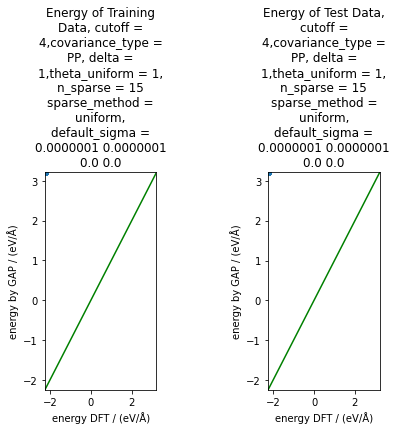

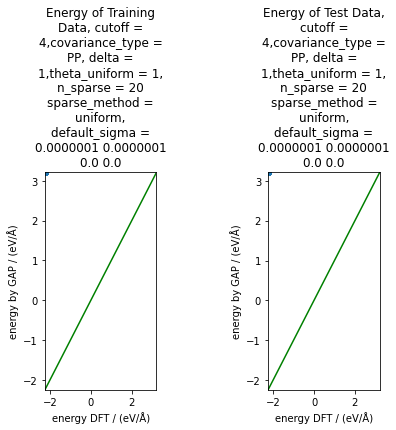

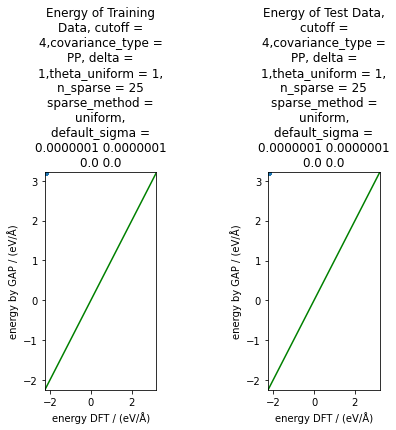

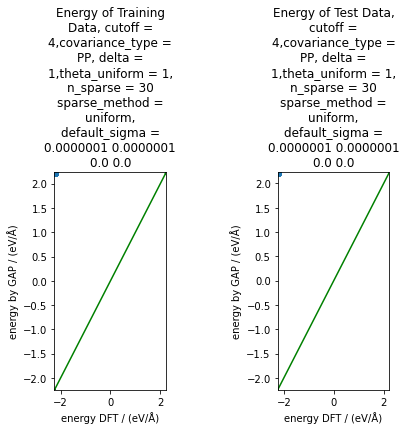

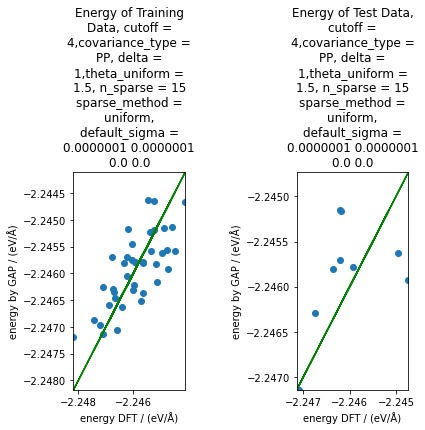

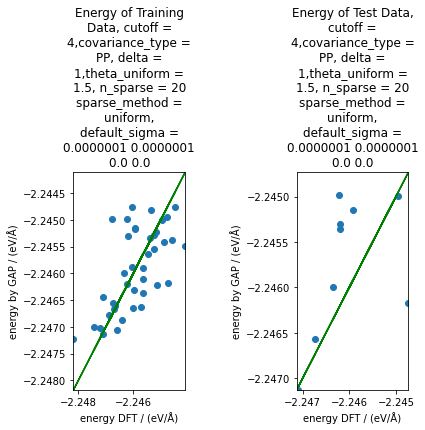

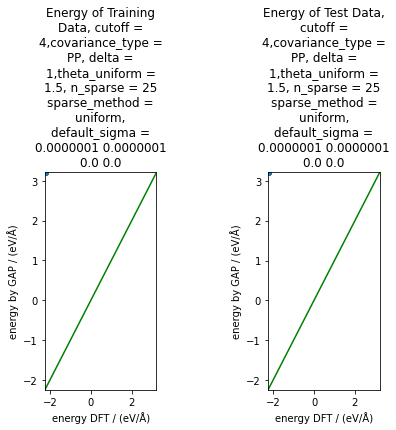

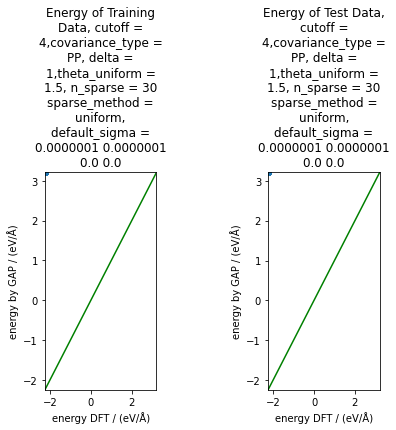

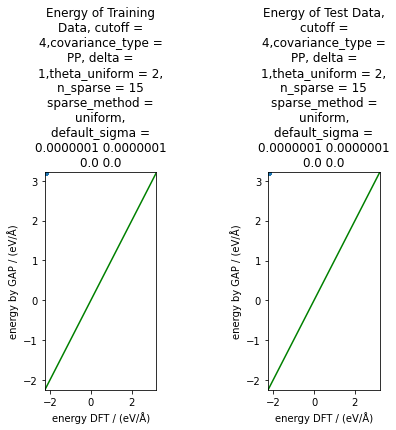

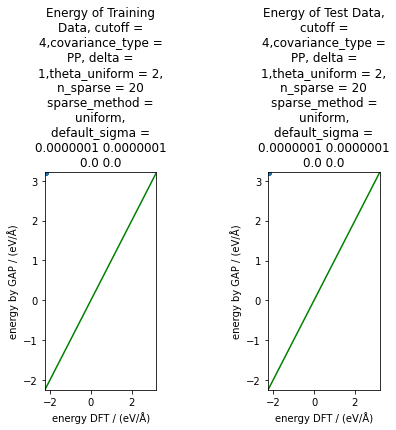

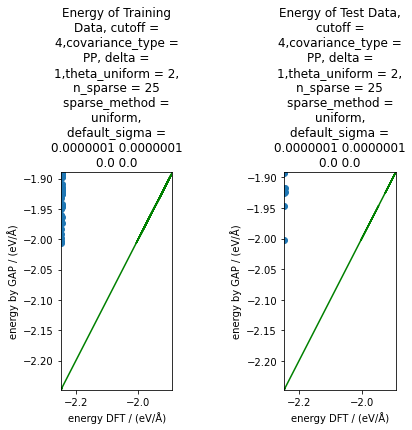

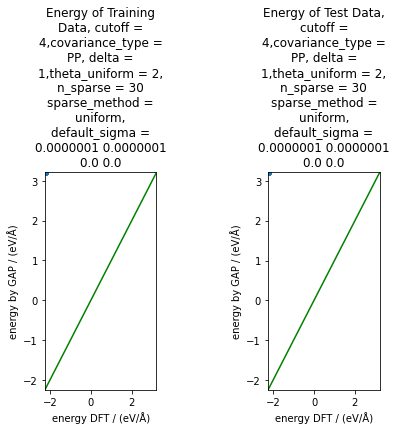

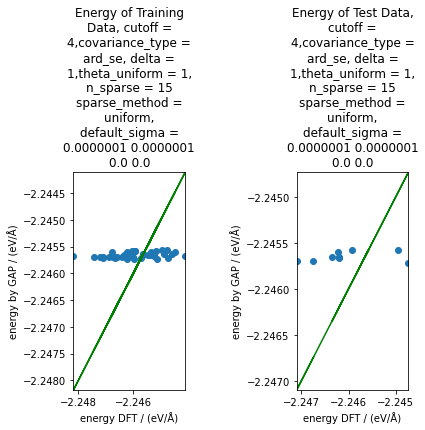

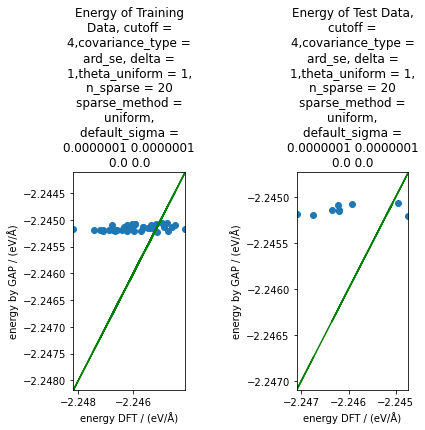

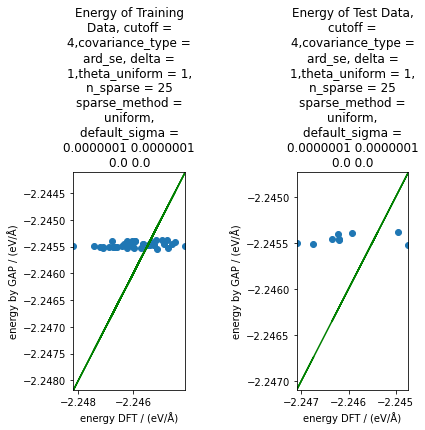

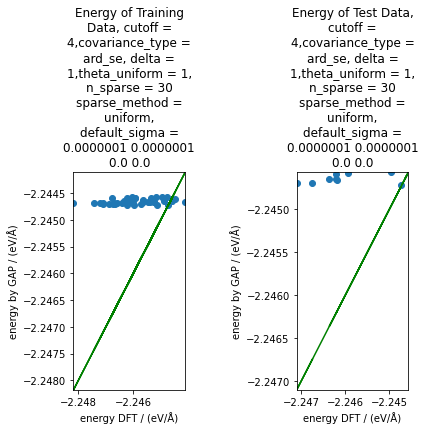

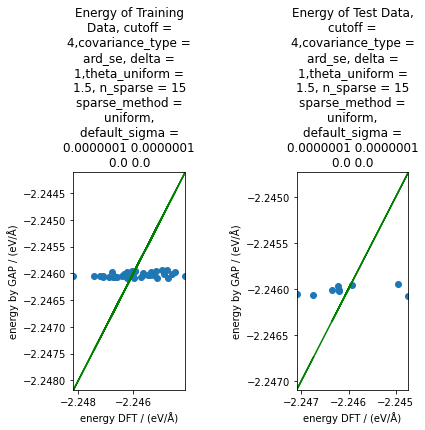

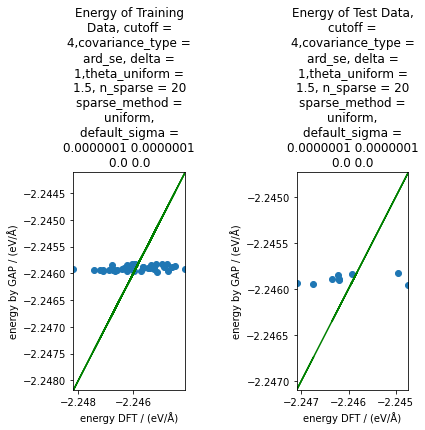

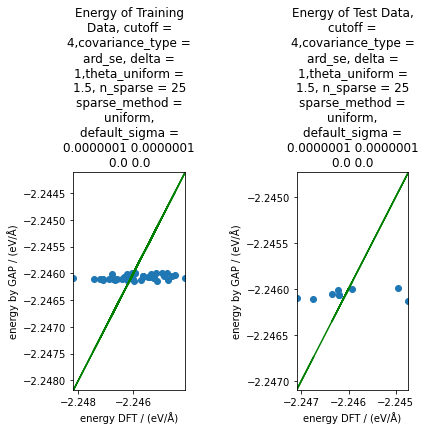

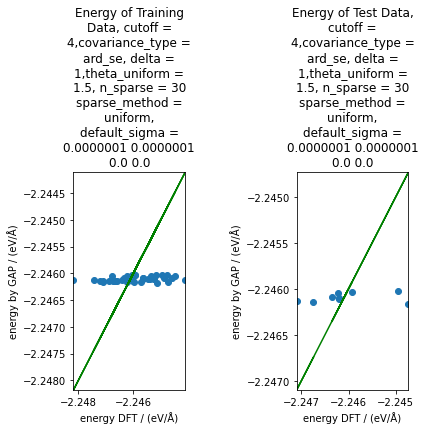

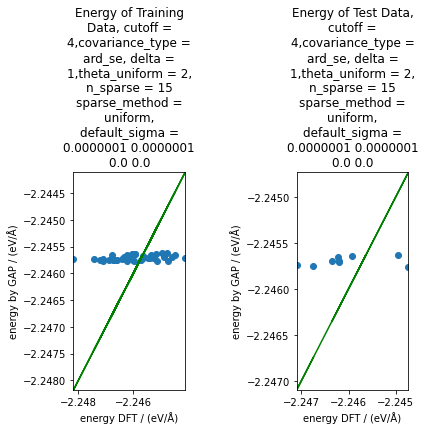

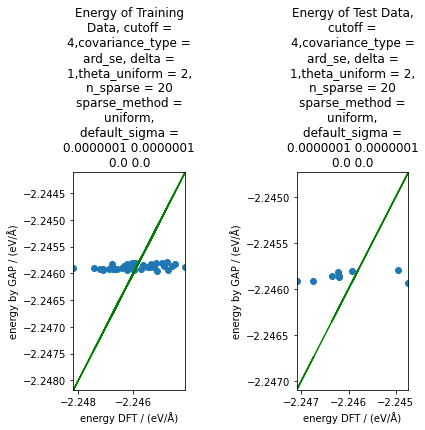

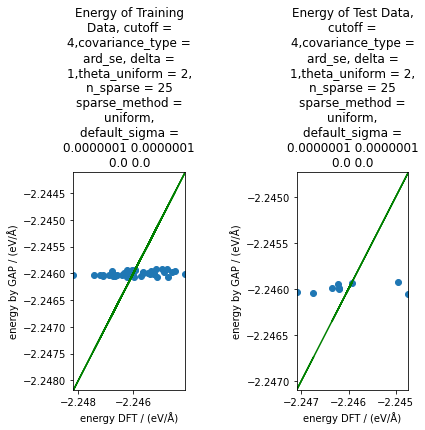

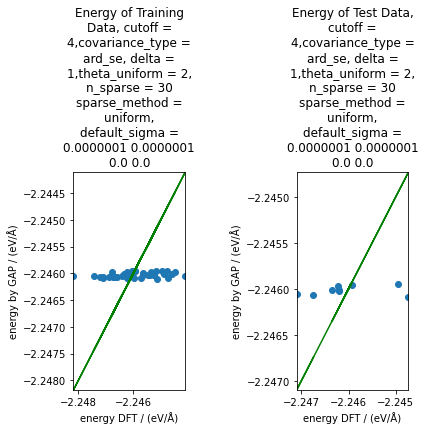

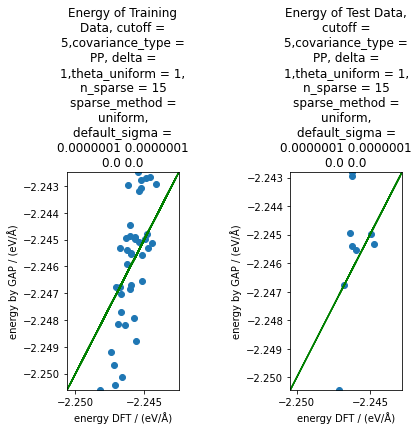

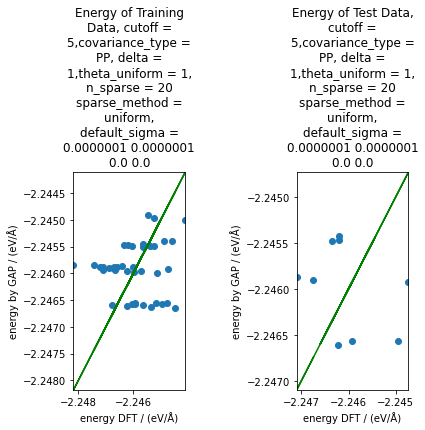

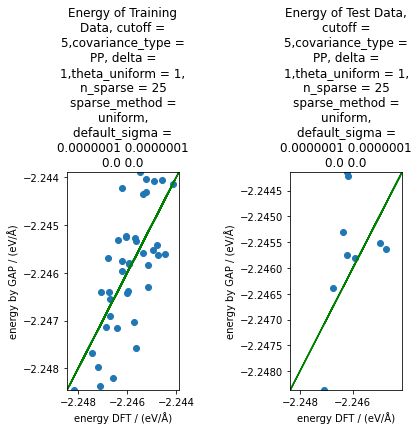

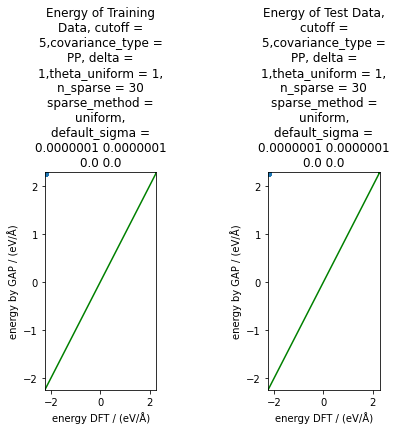

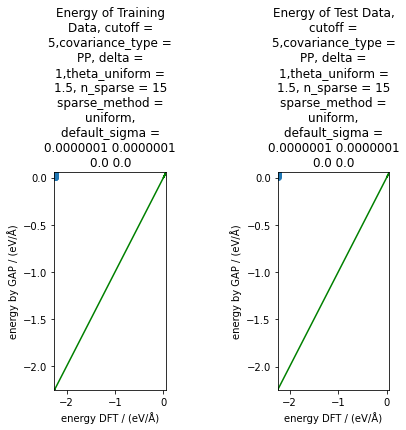

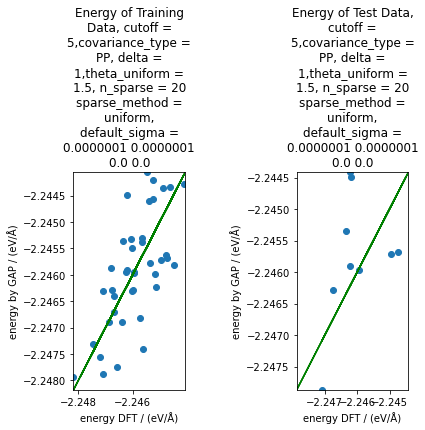

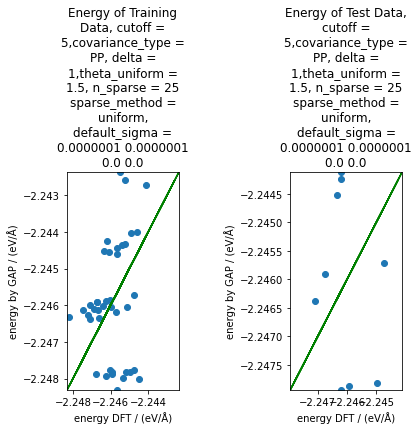

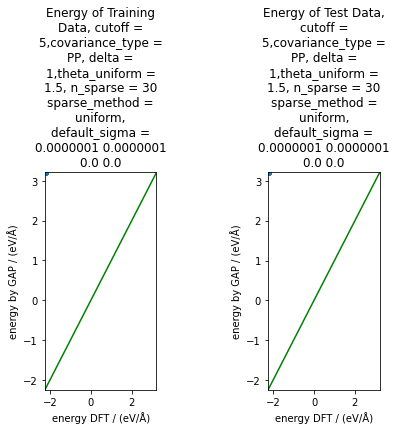

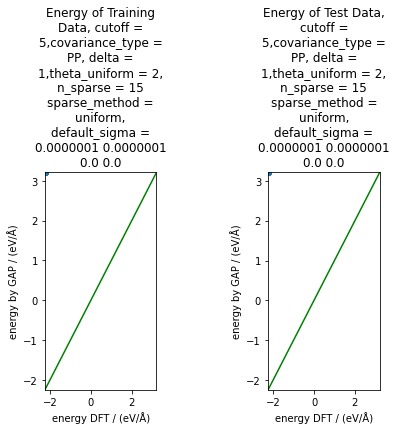

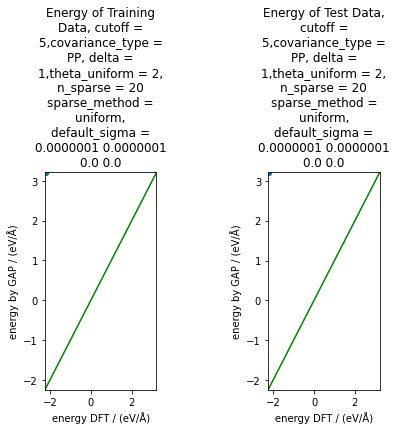

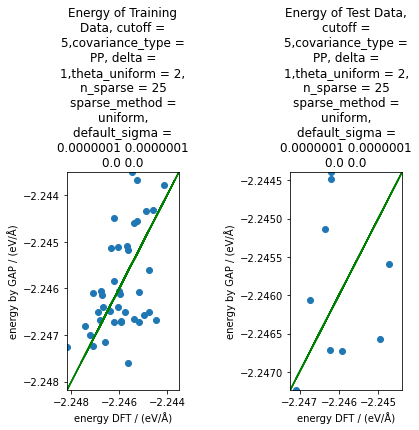

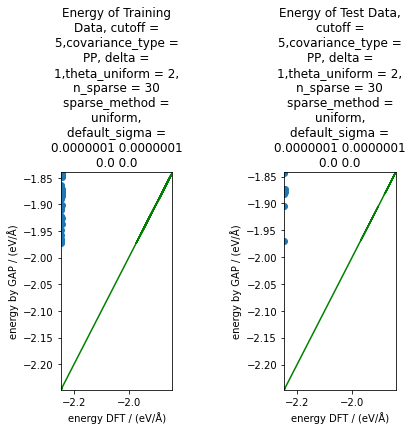

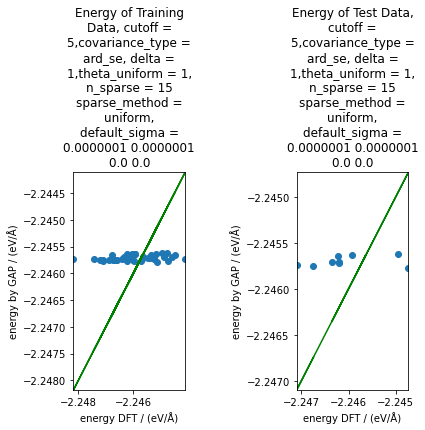

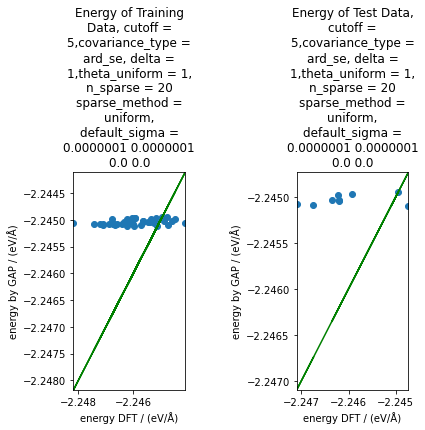

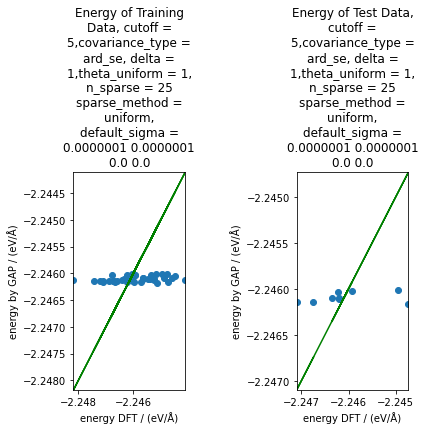

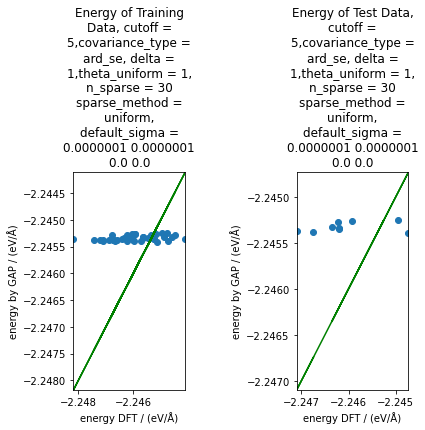

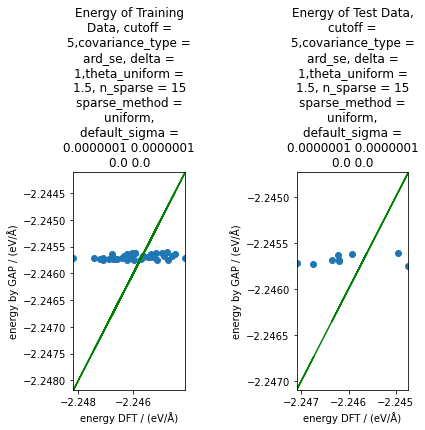

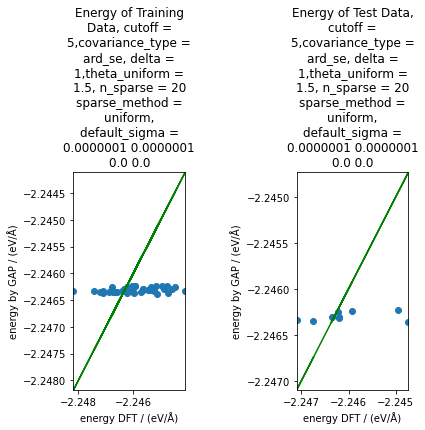

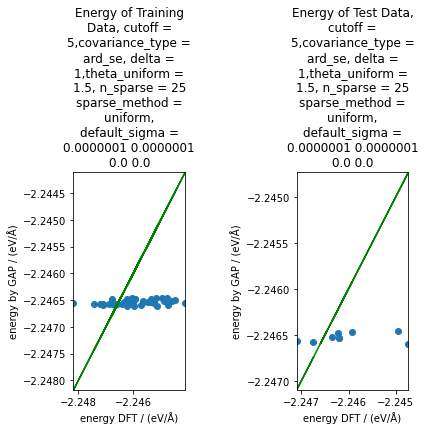

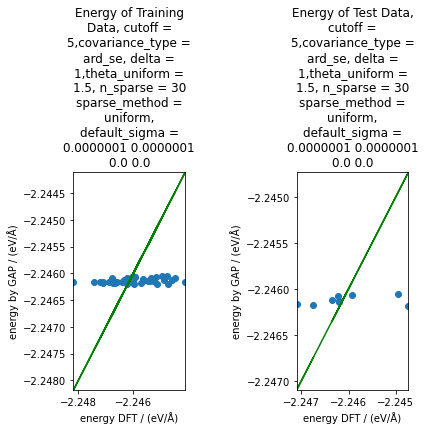

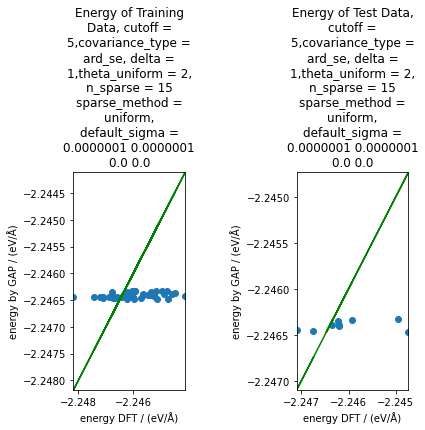

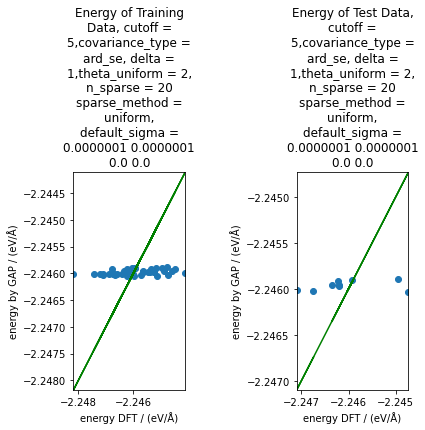

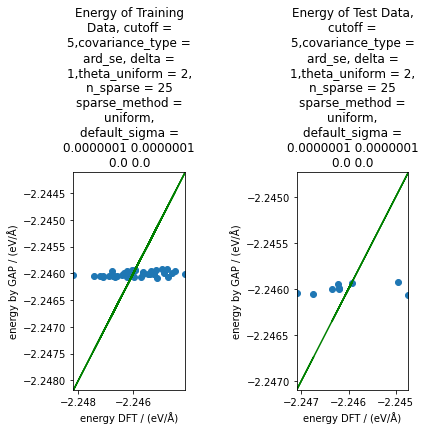

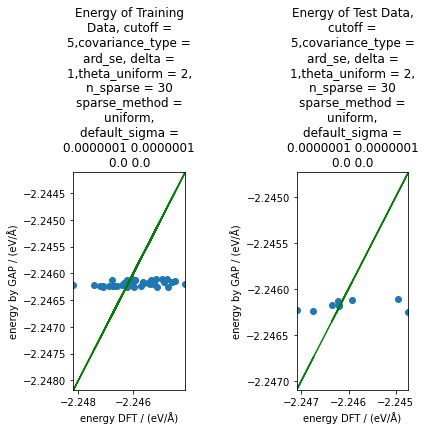

In [5]:
for i,(cut,cov,delta,theta,nsparse,sparse,sigma) in enumerate(comb):
    descriptor_2b = distance_2b(cutoff=cut, covariance_type=cov,delta=delta,theta_uniform=theta,
                                n_sparse=nsparse, sparse_method=sparse,add_species='T')
    # Make model
    model = GAPModel()
    
    # Select filename in which potential should be stored 
    potential=f"GAP{i}.xml"
    
    # Get descriptor parameter string
    parameters = descriptor_2b.get_parameter_string()
    # Train model
    model.train(parameters, training_data=train_file,GAP_potential=potential,sigma=sigma,print_output=True)
    
    # Select filename in which predictions should be stored for train data 
    prediction_train = f"quip_2b_train{i}.xyz"
    
    # Predict energies on training data
    model.predict(Test_Data=train_file, GAP_potential=potential, QUIP_Prediction=prediction_train,print_output=True)
    
    # Select filename in which predictions should be stored for test data 
    prediction_test = f"quip_2b_test{i}.xyz"

    # Predict energies on test data
    model.predict(Test_Data=test_file, GAP_potential=potential, QUIP_Prediction=prediction_test)
    
    # Plot ennergies to see quality of the fit
    plot = QualityPlot()
    
    # Make subplots object, returning axis object which is going to be passed to QualityPlot
    figs, axs = plt.subplots(nrows=1,ncols=2,gridspec_kw={'wspace':1,'hspace':1})
    
    # Plot predicted energies of training data against real energies of training data
    plot.energies_on_energies(real_values=train_file, predicted_values=prediction_train, 
                            axis=axs[0],
                            title="\n".join(wrap(f"Energy of Training Data, cutoff = {cut},"
                            f"covariance_type = {cov}, delta = {delta},"
                            f"theta_uniform = {theta}, n_sparse = {nsparse} "
                            f"sparse_method = {sparse}, default_sigma = {sigma}",20)))
    
    # Plot predicted energies of test data against real energies of test data
    plot.energies_on_energies(real_values=test_file, predicted_values=prediction_test, 
                            axis=axs[1], 
                            title="\n".join(wrap(f"Energy of Test Data, cutoff = {cut},"
                            f"covariance_type = {cov}, delta = {delta},"
                            f"theta_uniform = {theta}, n_sparse = {nsparse} "
                            f"sparse_method = {sparse}, default_sigma = {sigma}",20)))
    
    
   
    
    

<ipython-input-6-199a1adfc47a>:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  figs, axs = plt.subplots(nrows=1,ncols=2,gridspec_kw={'wspace':1,'hspace':1})


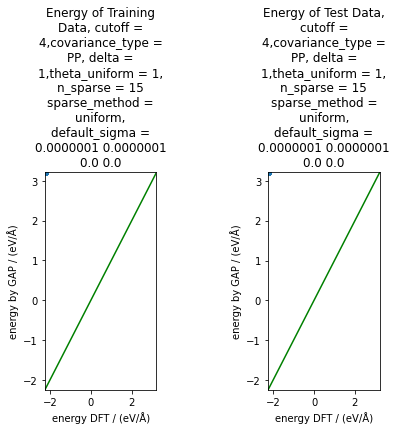

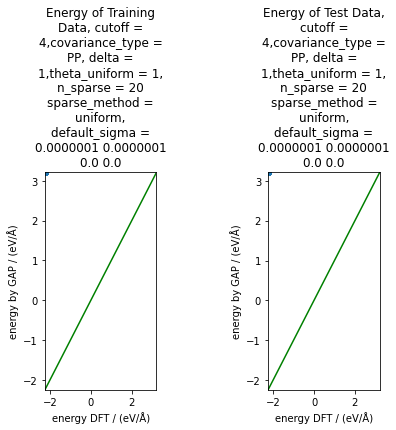

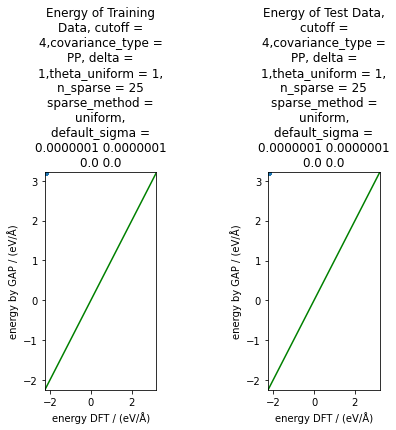

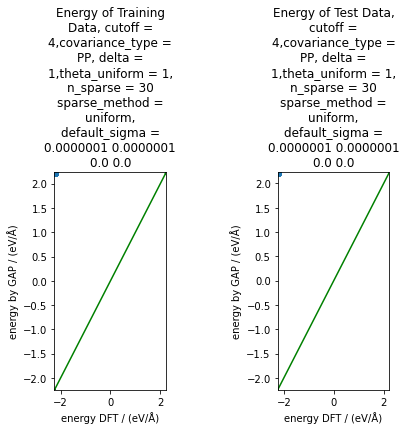

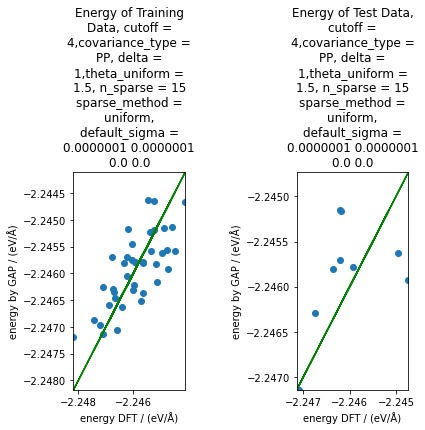

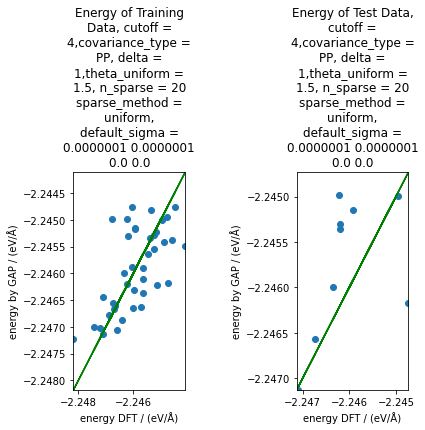

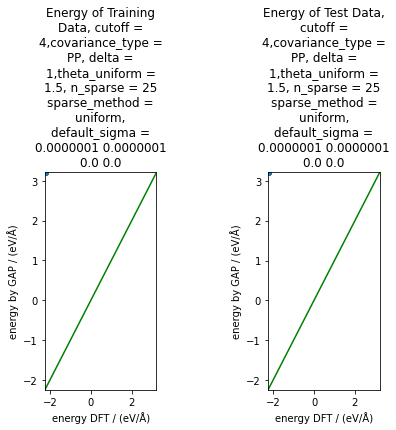

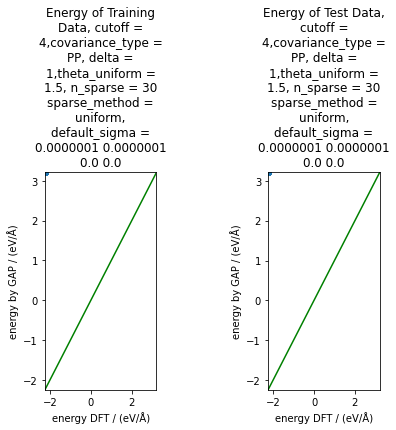

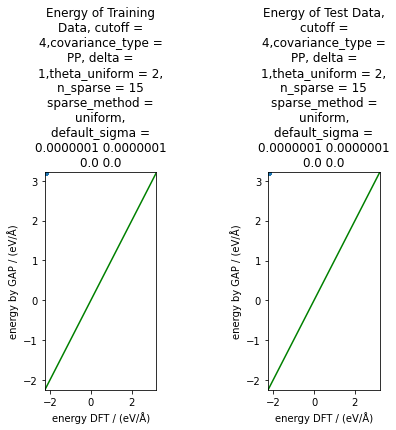

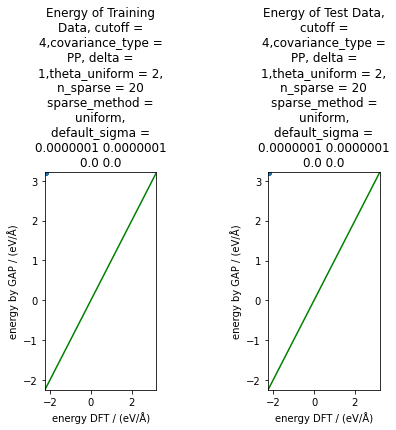

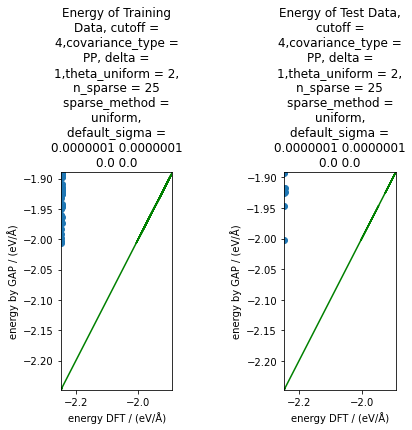

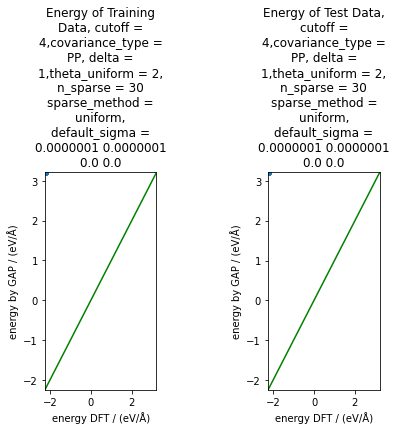

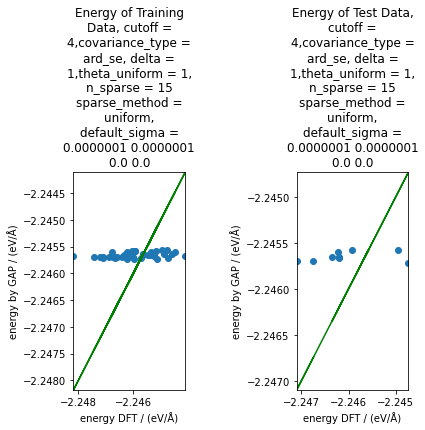

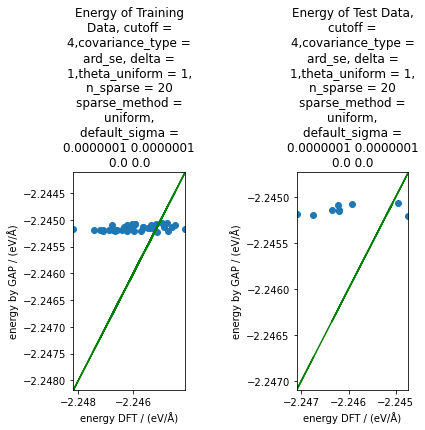

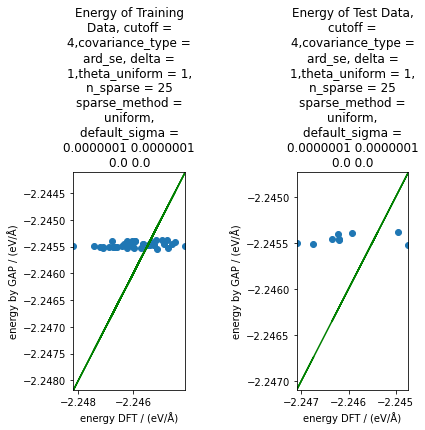

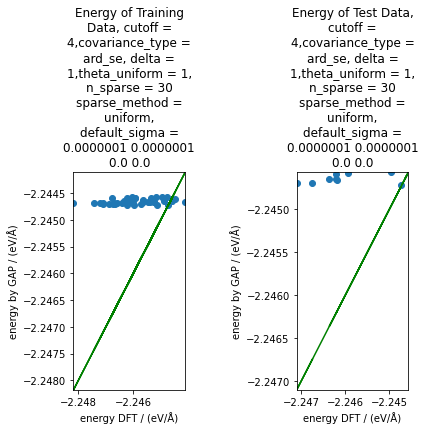

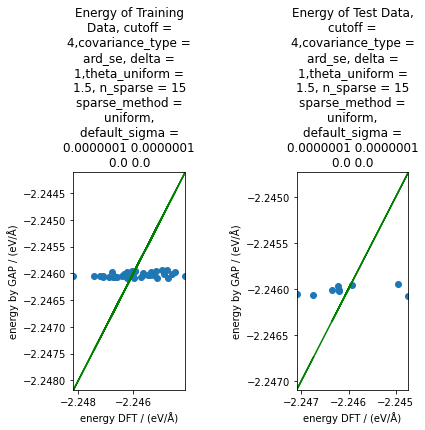

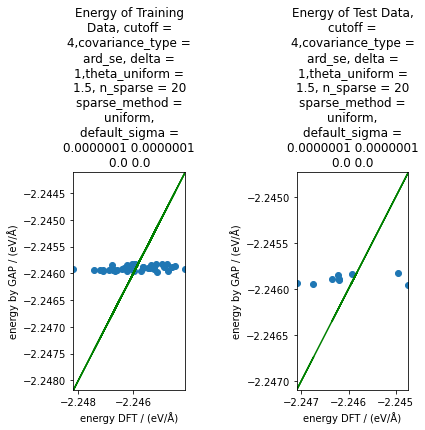

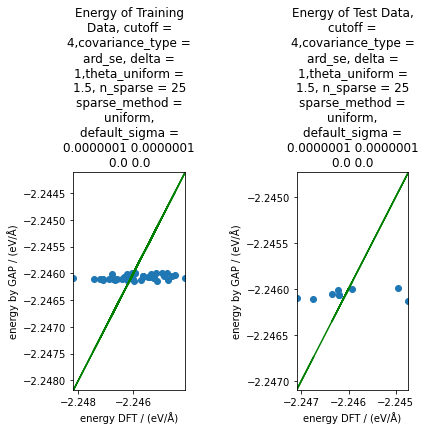

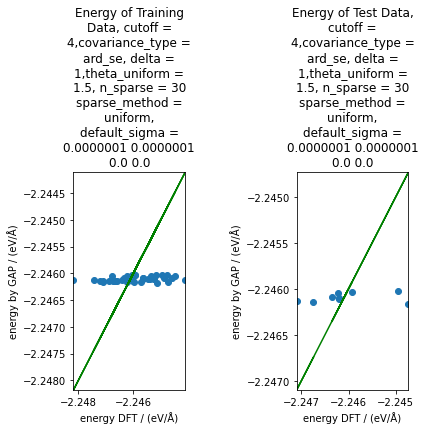

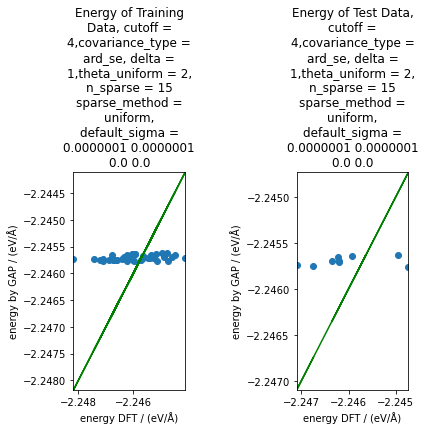

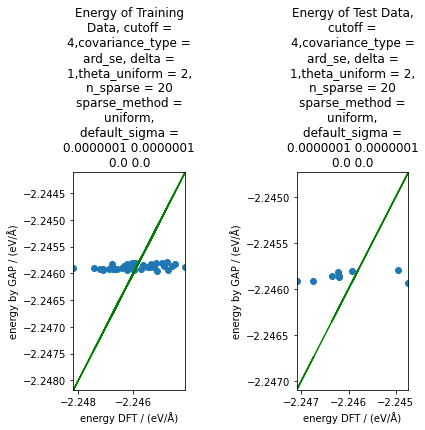

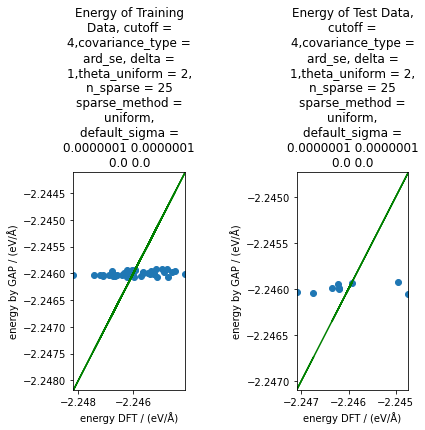

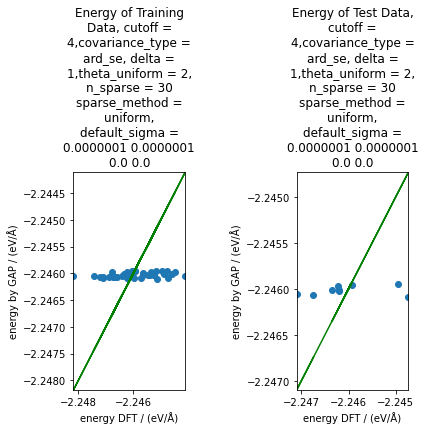

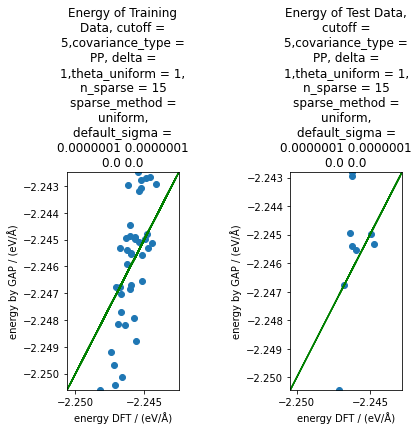

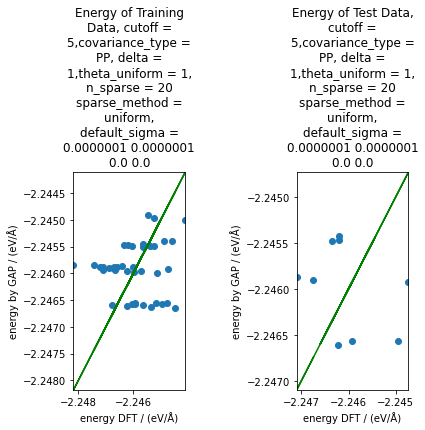

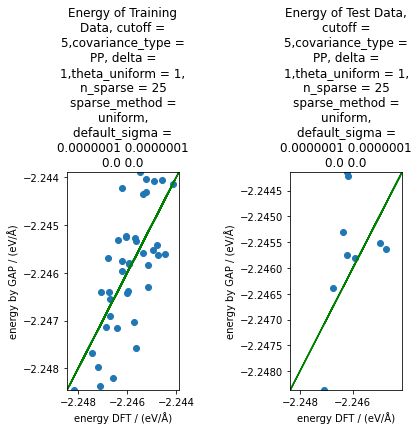

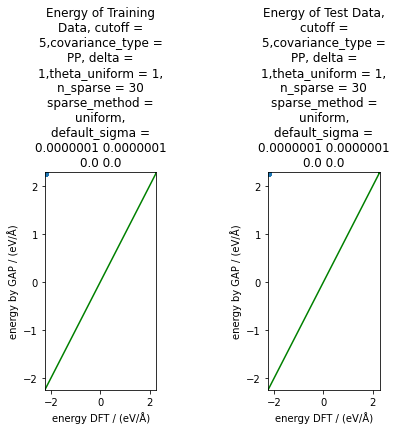

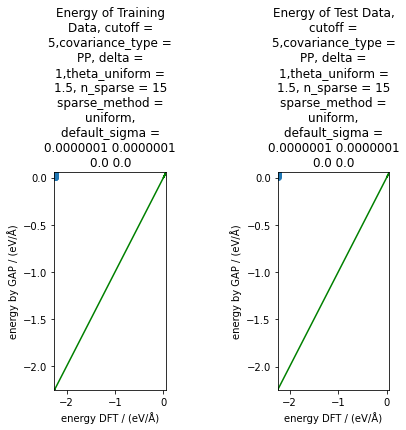

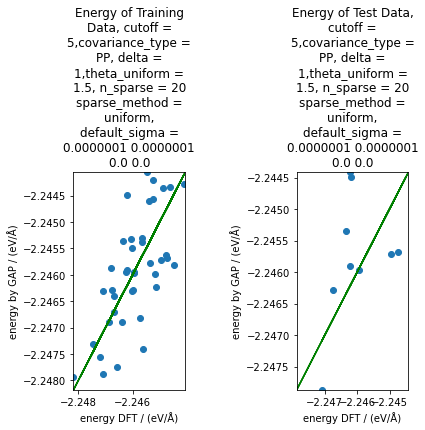

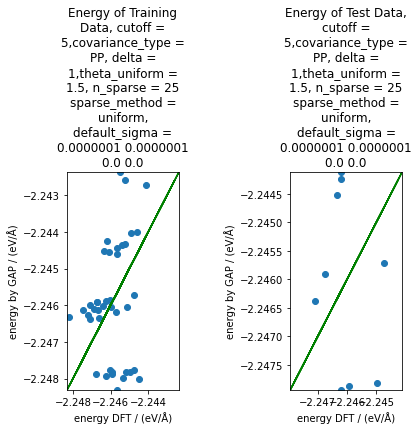

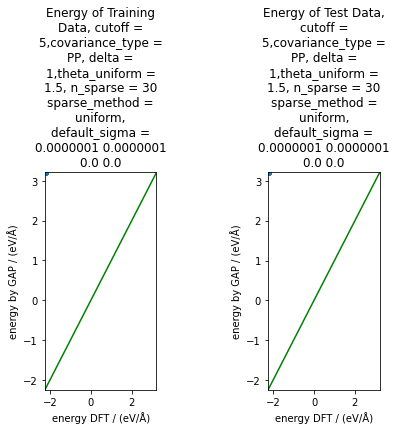

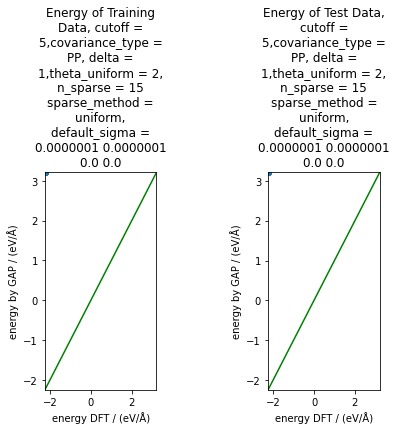

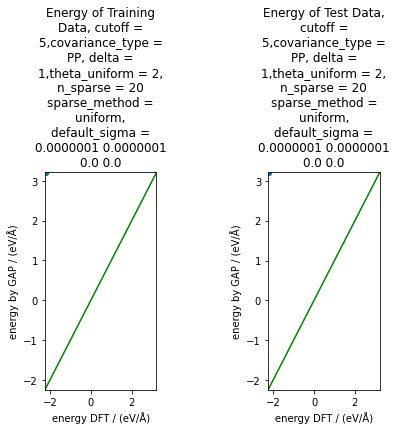

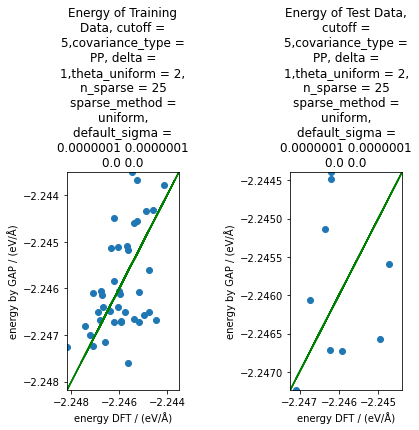

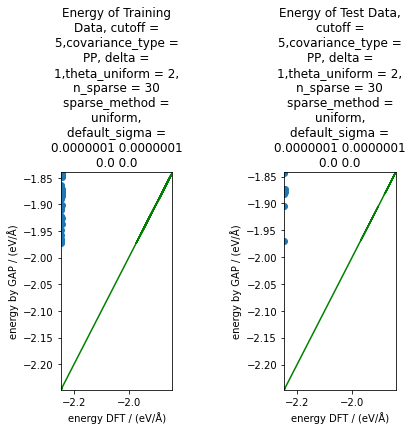

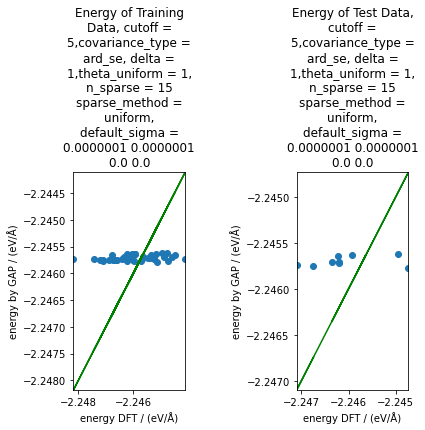

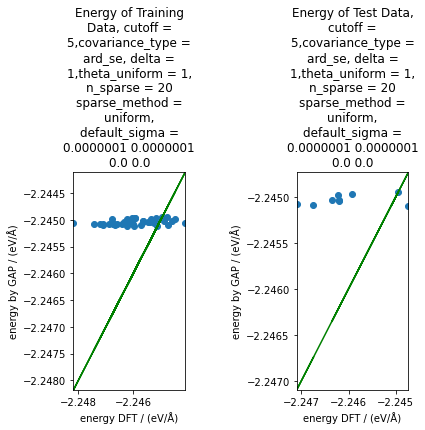

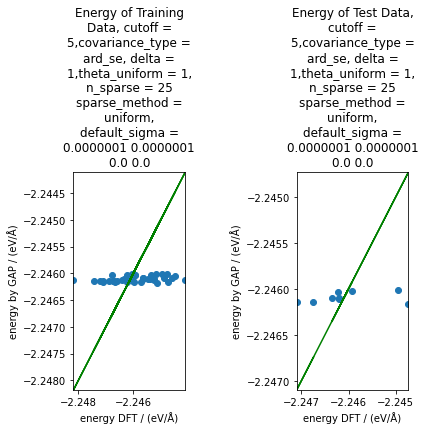

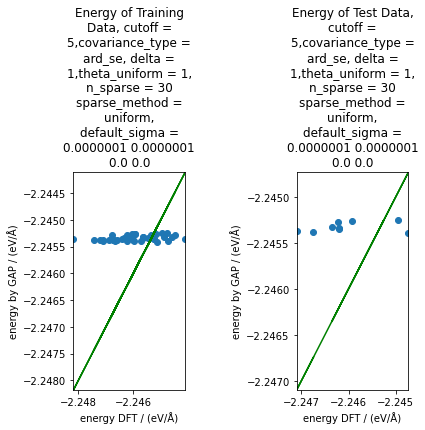

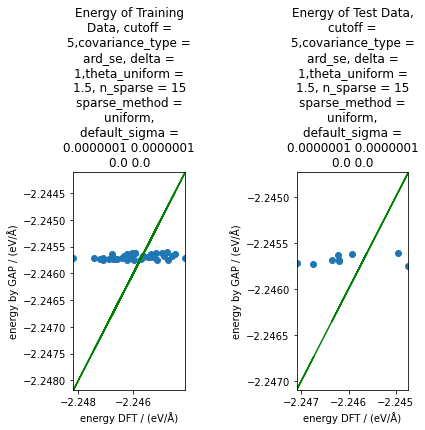

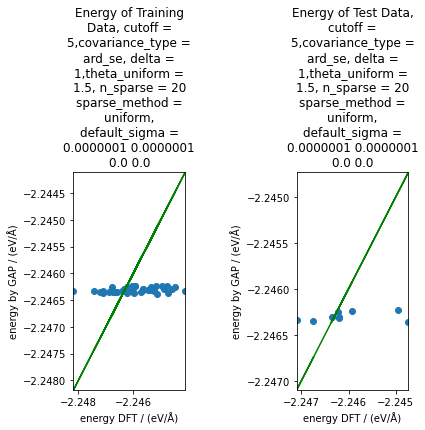

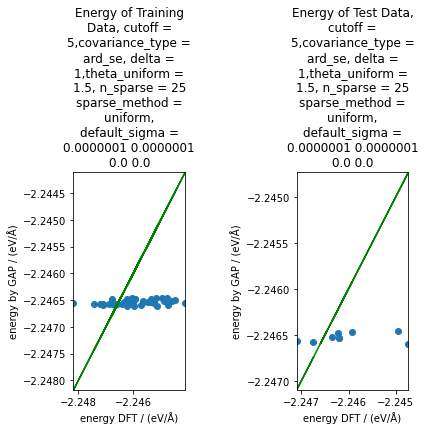

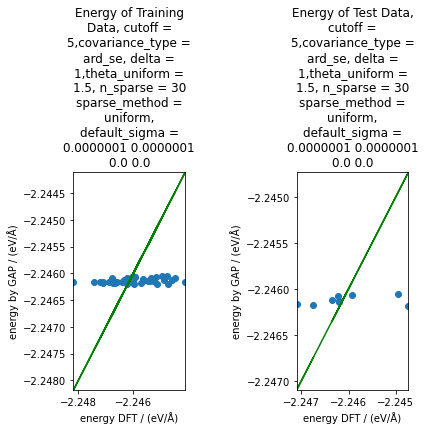

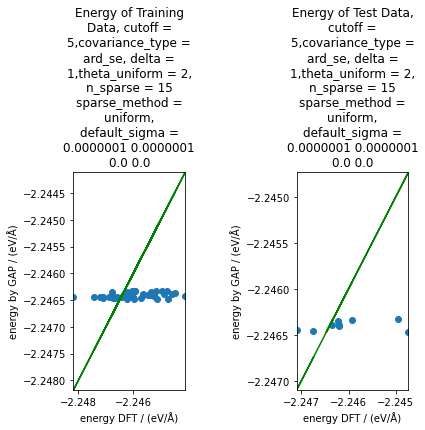

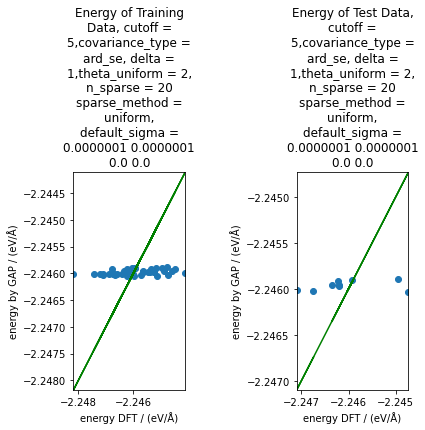

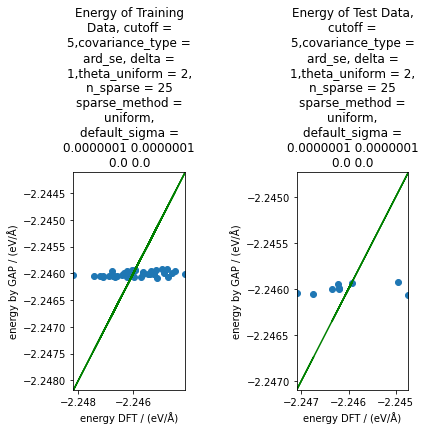

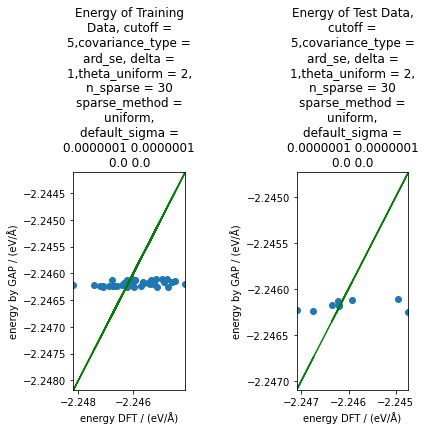

In [6]:
 for i,(cut,cov,delta,theta,nsparse,sparse,sigma) in enumerate(comb):
    # Plot ennergies to see quality of the fit
    plot = QualityPlot()
    
    # Make subplots object, returning axis object which is going to be passed to QualityPlot
    figs, axs = plt.subplots(nrows=1,ncols=2,gridspec_kw={'wspace':1,'hspace':1})
    
    # Plot predicted energies of training data against real energies of training data
    plot.energies_on_energies(real_values=train_file, predicted_values=f"quip_2b_train{i}.xyz", 
                            axis=axs[0],
                            title="\n".join(wrap(f"Energy of Training Data, cutoff = {cut},"
                            f"covariance_type = {cov}, delta = {delta},"
                            f"theta_uniform = {theta}, n_sparse = {nsparse} "
                            f"sparse_method = {sparse}, default_sigma = {sigma}",20)))
    
    # Plot predicted energies of test data against real energies of test data
    plot.energies_on_energies(real_values=test_file, predicted_values=f"quip_2b_test{i}.xyz", 
                            axis=axs[1], 
                            title="\n".join(wrap(f"Energy of Test Data, cutoff = {cut},"
                            f"covariance_type = {cov}, delta = {delta},"
                            f"theta_uniform = {theta}, n_sparse = {nsparse} "
                            f"sparse_method = {sparse}, default_sigma = {sigma}",20)))
    from matplotlib.backends.backend_pdf import PdfPages
    with PdfPages(f"plot_test{i}.pdf") as pdf:
        pdf.savefig()